In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score


In [42]:
data=pd.read_csv('Mall_Customers.csv')
data['Gender']=data['Gender'].map({'Male':0,'Female':1})

# Define the target variable (e.g., categorize Spending Score into low (0) and high (1))
# Assuming scores <= 50 are "low spenders" and > 50 are "high spenders"
data['Spending_Category'] = data['Spending Score (1-100)'].apply(lambda x: 1 if x > 50 else 0)

In [43]:
X=data[['Gender','Age','Annual Income (k$)']]
y=data['Spending_Category']

#Standardize the feature
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [47]:
# Define the range of K values to tX_test
k_values=range(1,10)
accuracy_scores=[]

for k in k_values:
    # Initialize the KNN classifire
    knn=KNeighborsClassifier(n_neighbors=k)
    # Fit the data model on training data
    knn.fit(X_train,y_train)
    # predict on the testing data
    y_pred=knn.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy_scores.append(accuracy)
    print(f"\nK={k} Classification Report: ")
    print(classification_report(y_test,y_pred))

print("\nAccuracy scores for different K values:")
# Display the accuracy scores for different K values
for k in k_values:
    print(f"K={k}: {accuracy:.4f}")



K=1 Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        23
           1       0.59      0.59      0.59        17

    accuracy                           0.65        40
   macro avg       0.64      0.64      0.64        40
weighted avg       0.65      0.65      0.65        40


K=2 Classification Report: 
              precision    recall  f1-score   support

           0       0.60      0.78      0.68        23
           1       0.50      0.29      0.37        17

    accuracy                           0.57        40
   macro avg       0.55      0.54      0.52        40
weighted avg       0.56      0.57      0.55        40


K=3 Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        23
           1       0.56      0.59      0.57        17

    accuracy                           0.62        40
   macro avg       0.62      0.62      0.

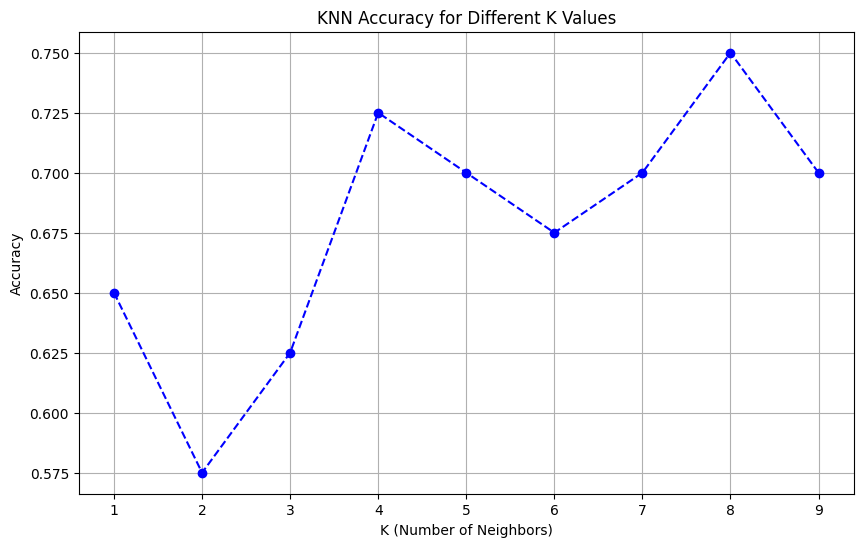

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='--', color='b')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [53]:

# Example custom input for a new customer: Female, 30 years old, Annual Income 70k
custom_data = pd.DataFrame([[1, 20, 20]],columns= ['Gender', 'Age', 'Annual Income (k$)']
)  # Female, Age 30, Annual Income 70k

# Scale the custom data
custom_data_scaled = scaler.transform(custom_data)
# Predict the category for the custom data
predicted_category = knn.predict(custom_data_scaled)

# Output the predicted category
if predicted_category[0] == 1:
    print("Predicted Spending Category: High Spender")
else:
    print("Predicted Spending Category: Low Spender")


Predicted Spending Category: High Spender


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
Accuracy: 0.0105

Classification Report:


C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                      precision    recall  f1-score   support

           Australia       0.00      0.00      0.00       370
             Austria       0.00      0.00      0.00       116
             Bahrain       0.00      0.60      0.00         5
             Belgium       0.01      0.09      0.01       625
              Brazil       0.27      1.00      0.43         9
              Canada       0.00      0.00      0.00        44
     Channel Islands       0.00      0.00      0.00       230
              Cyprus       0.00      0.00      0.00       186
      Czech Republic       0.00      0.00      0.00         9
             Denmark       0.01      0.01      0.01       124
                EIRE       0.00      0.00      0.00      2322
  European Community       0.00      0.00      0.00        16
             Finland       0.00      0.00      0.00       213
              France       0.00      0.00      0.00      2525
             Germany       0.02      0.75      0.05      2785
       

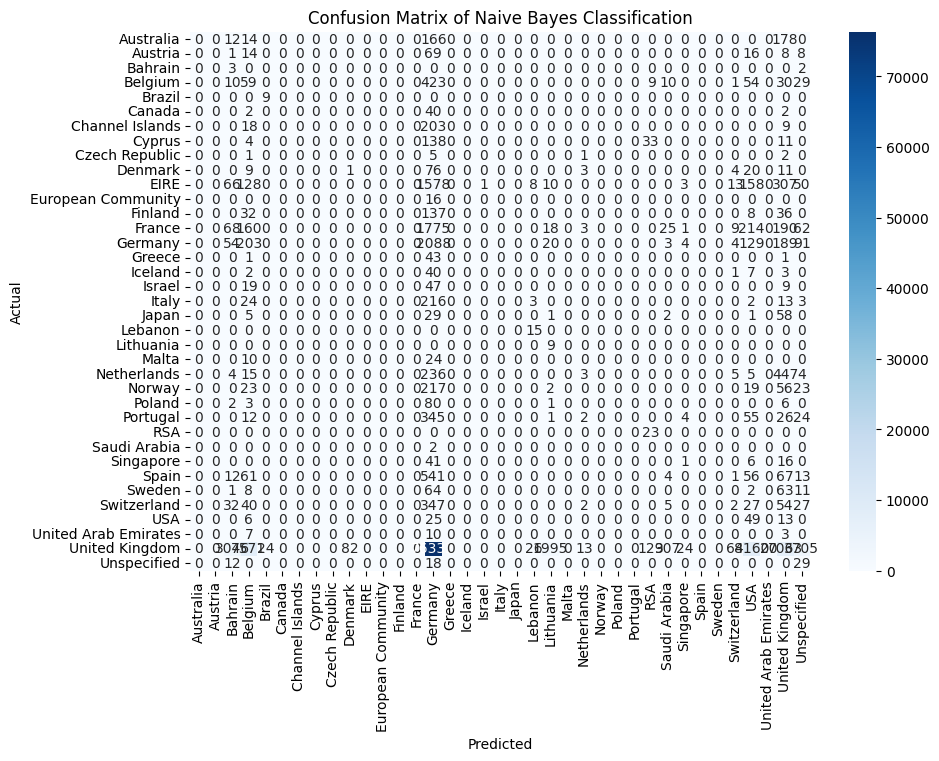

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("Online_Retail.csv", encoding='latin1')

print(dataset.head())

# Dropping rows with missing CustomerID as we need it for classification
dataset = dataset.dropna(subset=['CustomerID'])

dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
dataset['InvoiceDay'] = dataset['InvoiceDate'].dt.day
dataset['InvoiceMonth'] = dataset['InvoiceDate'].dt.month
dataset['InvoiceHour'] = dataset['InvoiceDate'].dt.hour

X = dataset[['Quantity', 'UnitPrice', 'InvoiceDay', 'InvoiceMonth', 'InvoiceHour']]
y = dataset['Country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix of Naive Bayes Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
